In [597]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [666]:
class MLP:
    def __init__(self, num_inputs=4, num_hidden=[5,6], num_output=2):
        
        
        #### initialize layers ###
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden 
        self.num_output = num_output
        
        self.layers = [self.num_inputs] + self.num_hidden + [self.num_output]
        
        ### initialize weights ###
        
        self.weights = []
        for i in range(0,len(self.layers)-1): #no weights for input layer
            weight = np.random.rand(self.layers[i], self.layers[i+1])
            self.weights.append(weight)
        
        
        ### initialize Activations ###
        
        self.activations = []
        for i in range(len(self.layers)):
            temp_zeros = np.zeros(self.layers[i])
            self.activations.append(temp_zeros)
        
        ### initialize Derivatives ###
        
        self.derivatives = []
        for i in range(len(self.layers)-1):
            temp_zeros = np.zeros((self.layers[i], self.layers[i+1]))
            self.derivatives.append(temp_zeros)
        
        self.bias_derivative = []
        for i in range(len(self.layers)-1):
            temp_zeros = np.zeros((self.layers[i+1]))
            self.bias_derivative.append(temp_zeros)
        
        self.bias = []
        for i in range(len(self.layers)-1):
            b = np.random.rand(self.layers[i+1])
            self.bias.append(b)
            
    def sigmoid(self, x):
        return 1/(1+np.exp(-1*x))
    
    def sigmoid_derivative(self,sigx):
        return sigx*(1.0-sigx)
    
    def Relu(self, x):
        return np.maximum(0,x)
    
    def Relu_derivative(self,relux):
        res = []
        for ele in relux:
            res.append(0) if ele==0 else res.append(1)
        return res
    
    def forward_propagation(self,inputs, activation='Relu'):
        activations = inputs
        self.activations[0] = inputs
        
        #iterate throuugh wi
        for i,weight in enumerate(self.weights):
            
            #calculate each layer input (hi)
            net_inputs = np.dot(activations, weight) + self.bias[i]
            
            if i == len(self.weights)-1:
                break
            if activation == 'Sigmoid':
                #Calculate the activations (ai)
                activations = self.sigmoid(net_inputs)

            elif activation == 'Relu':
                activations = self.Relu(net_inputs)
                
            self.activations[i+1] = activations
            
        activations = self.sigmoid(net_inputs)   
        self.activations[len(self.weights)] = activations
        return activations
    
    def back_propagation(self, error, activation = 'Relu'):
        
        for i in reversed(range(len(self.derivatives))):
            ## get Sigmoid(h[i+1]) = activations[i+1]
            activations = self.activations[i+1] 
            
            if i == len(self.derivatives)-1 or activation == 'Sigmoid': 
                ## delta = (a[i+1] - y) * sigmoid'(h[i+1])
                delta = error * self.sigmoid_derivative(activations)
            else:
                ## delta = (a[i+1] - y) * sigmoid'(h[i+1])
                delta = error * self.Relu_derivative(activations)

            ## calculate error derivative of current layer ## (delta E/ delta Wi) 
            current_act = self.activations[i]
            
            #transform current_act into 3x1 matrix (layers[i]x1)
            current_act = current_act.reshape(current_act.shape[0], -1)  #-1 tells to automatically calculate the value of the column
            
            #transform delta into 1X2 matrix (1xlayers[i+1])
            delta = delta.reshape(1,len(delta))
            
            ## (delta E/ delta Wi) ##
            self.derivatives[i] = np.dot(current_act, delta) #(layers[i]xlayers[i+1])         
            self.bias_derivative[i] = delta
            
            ## calculate new error ##
            error = np.dot(delta,self.weights[i].T).flatten()
            

        return error
    
    
    def gradient_decent(self, learning_rate = 0.5):
        
        for i in range(len(self.weights)):
            weight = self.weights[i]
            bias = self.bias[i]
            derivative = self.derivatives[i]
            weight = weight + learning_rate * derivative
            bias = bias + learning_rate* self.bias_derivative[i]
            self.weights[i] = weight
    
    def train(self,inputs, targets, epochs = 50, learning_rate = 0.2, verbose = False, activation = 'Relu'):
        for i in range(0,epochs):   
            sum_error = 0
            if verbose:
                print("\n-------------Epoch: {}----------------\n".format(i+1))
            
            for (input, target) in zip(inputs,targets):
                #forward prop
                output = self.forward_propagation(input, activation = activation)

                #calculate error
                error = target - output
                
                sum_error +=self.mse(target, output)
                #sum_error += abs(error)
                
                #back Prop
                error = self.back_propagation(error, activation = 'Relu')
                
                #gradient descent
                self.gradient_decent(learning_rate)
                
            if verbose:
                print("-------------ERROR: {}----------------\n\n".format(sum_error.round(5)))            
    
    def sign(self,x):
        return 0 if x<0 else 1    
    
    def mse(self,target, output):
        sum = 0
        for i in range(len(target)):
            sum+= (target[i]-output[i])**2
        return sum/2


    def regression_predict(self,input):
        output=self.forward_propagation(input)
        print(output)
        return output
    
    def get_weights(self):
        return self.weights

In [705]:
class MLP_Classifier:
    def __init__(self, num_inputs=4, num_hidden=[5,6], num_output=2):
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden 
        self.num_output = num_output
        
        self.layers = [self.num_inputs] + self.num_hidden + [self.num_output]
        
        ### initialize weights ###
        
        self.weights = []
        for i in range(0,len(self.layers)-1): #no weights for input layer
            weight = np.random.rand(self.layers[i], self.layers[i+1])
            self.weights.append(weight)
        
        
        ### initialize Activations ###
        
        self.activations = []
        for i in range(len(self.layers)):
            temp_zeros = np.zeros(self.layers[i])
            self.activations.append(temp_zeros)
        
        ### initialize Derivatives ###
        
        self.derivatives = []
        for i in range(len(self.layers)-1):
            temp_zeros = np.zeros((self.layers[i], self.layers[i+1]))
            self.derivatives.append(temp_zeros)
        
        self.bias_derivative = []
        for i in range(len(self.layers)-1):
            temp_zeros = np.zeros((self.layers[i+1]))
            self.bias_derivative.append(temp_zeros)
        
        self.bias = []
        for i in range(len(self.layers)-1):
            b = np.random.rand(self.layers[i+1])
            self.bias.append(b)
            
    def sigmoid(self, x):
        return 1/(1+np.exp(-1*x))
    
    def sigmoid_derivative(self,sigx):
        return sigx*(1.0-sigx)
    
    def Relu(self, x):
        return np.maximum(0,x)
    
    def Relu_derivative(self,relux):
        res = []
        for ele in relux:
            res.append(0) if ele==0 else res.append(1)
        return res
    
    def forward_propagation(self,inputs, activation='Relu'):
        activations = inputs
        self.activations[0] = inputs
        
        #iterate throuugh wi
        for i,weight in enumerate(self.weights):
            
            #calculate each layer input (hi)
            net_inputs = np.dot(activations, weight) + self.bias[i]
            
            if i == len(self.weights)-1:
                break
            if activation == 'Sigmoid':
                #Calculate the activations (ai)
                activations = self.sigmoid(net_inputs)

            elif activation == 'Relu':
                activations = self.Relu(net_inputs)   
            self.activations[i+1] = activations
            
        activations = self.sigmoid(net_inputs)   
        self.activations[len(self.weights)] = activations
        #print(self.activations[1:], net_inputs)
        return activations
    
    def back_propagation(self, error, activation = 'Relu'):
        
        for i in reversed(range(len(self.derivatives))):
            ## get Sigmoid(h[i+1]) = activations[i+1]
            activations = self.activations[i+1] 
            
            if i == len(self.derivatives)-1 or activation == 'Sigmoid': 
                ## delta = (a[i+1] - y) * sigmoid'(h[i+1])
                delta = error * self.sigmoid_derivative(activations)
            else:
                ## delta = (a[i+1] - y) * sigmoid'(h[i+1])
                delta = error * self.Relu_derivative(activations)

            ## calculate error derivative of current layer ## (delta E/ delta Wi) 
            current_act = self.activations[i]
            #
            #transform current_act into 3x1 matrix (layers[i]x1)
            current_act = current_act.reshape(current_act.shape[0], -1)  #-1 tells to automatically calculate the value of the column
            
            #transform delta into 1X2 matrix (1xlayers[i+1])
            delta = delta.reshape(1,len(delta))
            
            ## (delta E/ delta Wi) ##
            self.derivatives[i] = np.dot(current_act, delta) #(layers[i]xlayers[i+1])         
            self.bias_derivative[i] = delta
            
            ## calculate new error ##
            error = np.dot(delta,self.weights[i].T).flatten()
            

        return error
    
    
    def gradient_decent(self, learning_rate = 0.5):
        
        for i in range(len(self.weights)):
            weight = self.weights[i]
            bias = self.bias[i]
            derivative = self.derivatives[i]
            weight = weight + learning_rate * derivative
            bias = bias + learning_rate* self.bias_derivative[i]
            self.weights[i] = weight
    
    def train(self,inputs, targets, epochs = 50, learning_rate = 0.2, verbose = False, activation = 'Relu'):
        for i in range(0,epochs):   
            sum_error = 0
            if verbose:
                print("\n-------------Epoch: {}----------------\n".format(i+1))
            
            for (input, target) in zip(inputs,targets):
                #forward prop
                output = self.forward_propagation(input, activation = activation)

                #calculate error
                error = target - output
                
                sum_error += target - output
                #sum_error += abs(error)
                
                #back Prop
                error = self.back_propagation(error, activation = 'Relu')
                
                #gradient descent
                self.gradient_decent(learning_rate)
                
            if verbose:
                print("-------------ERROR: {}----------------\n\n".format(sum_error.round(5)/inputs.shape[1]))            

    def classify_predict(self,input):
        output = self.forward_propagation(input)
        pred = np.where(output == max(output))[0]
        return pred
    
    def get_weights(self):
        return self.weights

In [668]:
mlp = MLP(2,[5],1)

In [669]:
inputs = np.array([[random()/2 for _ in range(2)] for _ in range(800)])
target = np.array([[i[0] + i[1]] for i in inputs])

In [670]:
mlp.train(inputs,target, 50, learning_rate = 0.05, verbose = True, activation = 'Relu')


-------------Epoch: 1----------------

-------------ERROR: 40.40573----------------



-------------Epoch: 2----------------

-------------ERROR: 17.23148----------------



-------------Epoch: 3----------------

-------------ERROR: 15.52494----------------



-------------Epoch: 4----------------

-------------ERROR: 13.40937----------------



-------------Epoch: 5----------------

-------------ERROR: 10.96942----------------



-------------Epoch: 6----------------

-------------ERROR: 8.43844----------------



-------------Epoch: 7----------------

-------------ERROR: 6.11566----------------



-------------Epoch: 8----------------

-------------ERROR: 4.22229----------------



-------------Epoch: 9----------------

-------------ERROR: 2.82434----------------



-------------Epoch: 10----------------

-------------ERROR: 1.864----------------



-------------Epoch: 11----------------

-------------ERROR: 1.23347----------------



-------------Epoch: 12----------------

--------

In [671]:
inputs[7]

array([0.17364382, 0.31901729])

In [672]:
target[7]

array([0.49266112])

In [673]:
mlp.regression_predict(inputs[7])

[0.49179673]


array([0.49179673])

In [674]:
mlp.regression_predict([0.1,0.4])

[0.50036645]


array([0.50036645])

In [675]:
mlp.regression_predict([0.1,0.3])

[0.38857433]


array([0.38857433])

In [676]:
mlp.regression_predict([0.1,0.05])

[0.16934932]


array([0.16934932])

## Mobile Phone Sales

In [677]:
df = pd.read_csv(r"C:\Users\rvikr\CEG ML Lab\train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [678]:
df = df[df['label'].isin([1,0])]

In [679]:
inputs_org = df.drop(['label'], axis=1)
target = df['label']

In [680]:
inputs_org.shape

(8816, 784)

In [681]:
def one_hot_encode(X):
    unique_values = list(set(X))
    unique_values.sort()
    res = [[1 if num == value else 0 for value in unique_values] for num in X]
    return res

In [682]:
target = one_hot_encode(target)

In [683]:
inputs.shape

(800, 2)

In [684]:
targets = np.array(target)

In [685]:
targets.shape

(8816, 2)

In [686]:
inputs_org = inputs_org.values

In [706]:
inputs = inputs_org/255
inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [711]:
mlp = MLP_Classifier(784,[16],2)

In [712]:
mlp.train(inputs,targets,10, 0.5,True, activation = 'Sigmoid')


-------------Epoch: 1----------------

-------------ERROR: [-0.56697522 -0.50467772]----------------



-------------Epoch: 2----------------



C:\Users\rvikr\AppData\Local\Temp\ipykernel_2096\1022464144.py:43: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


-------------ERROR: [ 0.04464432 -0.04491029]----------------



-------------Epoch: 3----------------

-------------ERROR: [ 0.0321836  -0.03150974]----------------



-------------Epoch: 4----------------

-------------ERROR: [ 0.02826784 -0.03022084]----------------



-------------Epoch: 5----------------

-------------ERROR: [ 0.02895786 -0.02847612]----------------



-------------Epoch: 6----------------

-------------ERROR: [ 0.03447658 -0.03549278]----------------



-------------Epoch: 7----------------

-------------ERROR: [ 0.02513959 -0.02839131]----------------



-------------Epoch: 8----------------

-------------ERROR: [ 0.03448802 -0.0370871 ]----------------



-------------Epoch: 9----------------

-------------ERROR: [ 0.01772871 -0.0184068 ]----------------



-------------Epoch: 10----------------

-------------ERROR: [ 0.03579139 -0.03353258]----------------




In [579]:
weights = mlp.get_weights()

In [581]:
bias = mlp.bias

In [713]:
inputs_org[0].shape

(784,)

In [714]:
## Test Images ##
images = []
predictions = []
for i in range(0,5):
    images.append(inputs_org[i*55].reshape(28, 28))
    predictions.append(mlp.classify_predict(inputs[i*55]))

C:\Users\rvikr\AppData\Local\Temp\ipykernel_2096\1022464144.py:43: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*x))


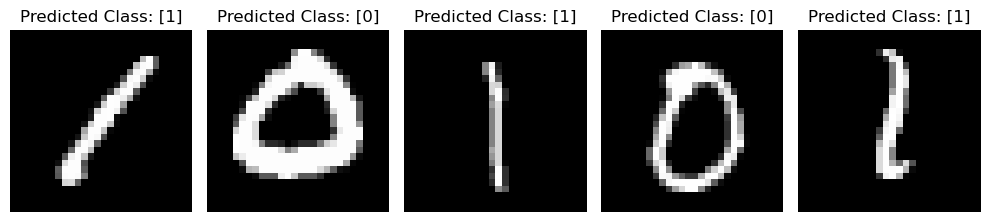

In [715]:
fig, axes = plt.subplots(1, 5, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the images and plot them
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray') 
    ax.axis('off') 
    ax.set_title('Predicted Class: {}'.format(predictions[i]))
plt.tight_layout()
plt.show()